<h1>Importar e instalar dependencias</h1>
<p>Descripción: Paso inicial para importar e instalar todas las dependencias necesarias.</p>

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


<h1>Puntos clave utilizando MP Holistic</h1>
<p>Descripción: Descripción de cómo utilizar MP Holistic para identificar puntos clave.</p>

CREA FUNCIONES DE DETETECCION Y LAS PRUEBA 

In [2]:
from keras import Sequential
from keras.src.utils import to_categorical
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorboard.program import TensorBoard

mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities



In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

def draw_styled_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    # Draw right hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

In [4]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


C:\Users\romel\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [5]:
draw_landmarks(frame, results)

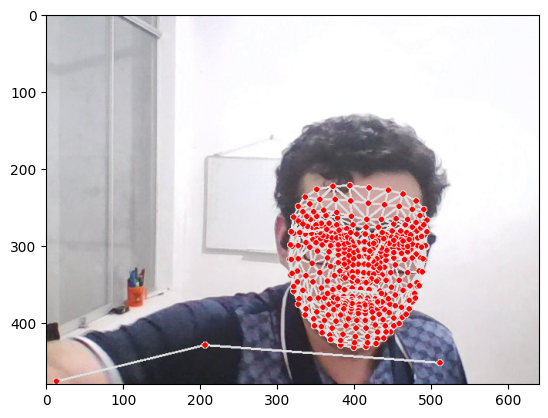

In [6]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


<h1>Extraer valores de puntos clave</h1>
<p>Descripción: Procedimiento para extraer los valores de los puntos clave identificados.</p>

In [8]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [9]:
# Suponemos que 'results' es el resultado de la detección de Mediapipe
pose = []
if results.pose_landmarks:
    for res in results.pose_landmarks.landmark:
        test = np.array([res.x, res.y, res.z, res.visibility])
        pose.append(test)
    pose = np.array(pose).flatten()
else:
    pose = np.zeros(33*4)  # 33 landmarks with x, y, z, visibility


In [10]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)  # 468 landmarks with x, y, z

In [11]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)  # 21 landmarks with x, y, z

In [12]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)  # 21 landmarks with x, y, z

In [13]:

if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    face = np.zeros(1404)

In [14]:

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)
np.save('0', result_test)

In [16]:
loaded_result = np.load('0.npy')
print(loaded_result)


[ 0.65386736  0.67891145 -1.3965807  ...  0.          0.
  0.        ]


<h1>Configurar carpetas para la colección</h1>
<p>Descripción: Instrucciones para organizar y configurar carpetas para la colección de datos.</p>

In [17]:
# ruta de dond exportar datos
DATA_PATH = os.path.join('MP_Data')

# Accion que trata de ddetectar
# actions = np.array(['hola', 'te_quiero', 'gracias'])
no_sequences = 30

DATA_PATH = os.path.join('MP_Data')
actions = np.array(['gracias'])
# 30 videos de datos
no_sequences = 30

# los videos tinenen tamaño de 30 
sequence_length = 30
# comenzar folder
start_folder = 0

In [18]:

for action in actions:
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass


<h1>Recopile valores de puntos clave para capacitación y pruebas</h1>
<p>Descripción: Método para recopilar valores de puntos clave que se usarán en la capacitación y pruebas del modelo.</p>

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder + no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()
cap.release()
cv2.destroyAllWindows()  


<h1>Preprocesar datos y crear etiquetas y funciones</h1>
<p>Descripción: Pasos para preprocesar los datos y crear etiquetas y funciones necesarias para el entrenamiento del modelo.</p>

In [28]:
from sklearn.model_selection import train_test_split
label_map = {label: num for num, label in enumerate(actions)}


<h3>Carga de los datos y asignación de etiquetas: </h3>   
   <p>itera sobre cada acción en actions.   </p>
    <p>Para cada acción, itera sobre 29 secuencias.</p>
    <p>Para cada secuencia, carga los datos de cada frame desde archivos .npy almacenados en DATA_PATH.</p>
    <p>Almacena cada secuencia de frames en la lista sequences.</p>
    <p>Asigna la etiqueta correspondiente a cada secuencia y la almacena en la lista labels.</p>

In [25]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hola', 'te_quiero', 'gracias'])
# 30 videos de datos
no_sequences = 30

# los videos tinenen tamaño de 30 
sequence_length = 30

In [26]:
sequences, labels = [], []

In [29]:
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
# np.array(sequences).shape
# np.array(labels).shape

# X = np.array(sequences)
# X.shape
# y = to_categorical(labels).astype(int)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
# y_test.shape

X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)



ValueError: Found input variables with inconsistent numbers of samples: [91, 90]


<h1>Construya y entrene la red neuronal LSTM</h1>
<p>Descripción: Guía para construir y entrenar una red neuronal LSTM con los datos preprocesados.</p>

In [13]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, Callback
from tqdm import tqdm
import numpy as np

CREACION DE LOS MODELOS

In [ ]:
# # Definir el modelo
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(len(actions), activation='softmax'))  # Cambiado de actions.shape[0] a len(actions)
#    

In [ ]:
#  # Compilar el modelo
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# 
# # Crear una clase de callback personalizada para la barra de progreso
# class TQDMProgressCallback(Callback):
#     def on_epoch_begin(self, epoch, logs=None):
#         if epoch == 0:
#             self.epochs = self.params['epochs']
#             self.progress_bar = tqdm(total=self.epochs, desc='Training Progress')
#         self.progress_bar.update(1)
# 
#     def on_epoch_end(self, epoch, logs=None):
#         self.progress_bar.set_postfix(logs)
# 
#     def on_train_end(self, logs=None):
#         self.progress_bar.close()

In [11]:
# # Entrenar el modelo con la barra de progreso
# tqdm_callback = TQDMProgressCallback()
# model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback, tqdm_callback])
# 
# # Resumen del modelo
# model.summary()

In [32]:
from tensorflow.keras.models import Sequential
import os
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [21]:
model.fit(X_train, y_train, epochs=2000)
model.summary()

NameError: name 'X_train' is not defined

In [19]:

# Definir el directorio de logs
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [20]:

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [16]:
class TQDMProgressCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if epoch == 0:
            self.epochs = self.params['epochs']
            self.progress_bar = tqdm(total=self.epochs, desc='Training Progress')
        self.progress_bar.update(1)

    def on_epoch_end(self, epoch, logs=None):
        self.progress_bar.set_postfix(logs)

    def on_train_end(self, logs=None):
        self.progress_bar.close()

In [18]:

# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])
# model.summary()


DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hola', 'te_quiero', 'gracias'])
no_sequences = 30



<h1>Haz predicciones</h1>
<p>Descripción: Instrucciones para hacer predicciones utilizando el modelo entrenado.</p>

In [18]:
# res = model.predict(X_test)
# 

In [19]:
# actions[np.argmax(res[4])]

In [20]:
# actions[np.argmax(y_test[4])]

In [27]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step



<h1>Guardar Pesos</h1>
<p>Descripción: Proceso para guardar los pesos del modelo entrenado.</p>

In [22]:
model.save('action.h5')
model.load_weights('action.h5')


In [ ]:
model.save('action.keras', include_optimizer=False)

In [28]:

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

In [29]:

model = load_model('action.keras')
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy')


<h1>Evaluación mediante Matriz de Confusión y Precisión</h1>
<p>Descripción: Cómo evaluar el rendimiento del modelo utilizando una matriz de confusión y métricas de precisión.</p>

In [36]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1)
yhat = np.argmax(yhat, axis=1)

print("Accuracy:", accuracy_score(ytrue, yhat))
print("Confusion Matrix:", multilabel_confusion_matrix(ytrue, yhat))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
Accuracy: 0.4
Confusion Matrix: [[[3 1]
  [1 0]]

 [[1 2]
  [0 2]]

 [[3 0]
  [2 0]]]



<h1>Prueba en tiempo real</h1>
<p>Descripción: Método para probar el modelo en tiempo real.</p>

In [37]:
from scipy import stats

In [38]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

    return output_frame




In [39]:
plt.figure(figsize=(18, 18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1800x1800 with 0 Axes>

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# # Definir las variables de ejemplo
# res = [0.8, 0.6, 0.4]  # Ejemplo de resultados
# actions = ["Accion 1", "Accion 2", "Accion 3"]  # Ejemplo de acciones
# image = np.zeros((500, 500, 3), dtype=np.uint8)  # Ejemplo de imagen
# 

# Visualization
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

plt.figure(figsize=(18, 18))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [33]:

# Real-time detection
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


NameError: name 'extract_keypoints' is not defined